### Codio Activity 4.1: Basic Joins on Datasets

This activity focuses on using the `merge` function to join DataFrame's as seen in Videos 4.1 and 4.2.  Merging DataFrames allows the combination of data along a shared categorical column.  The DataFrames do not need to be the same shape and depending on certain arguments used, the result of a merge can contain different values.  Specifically, using different kinds of joins -- `inner, outer, left, right`, different DataFrames are produced.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

In [1]:
import pandas as pd

### The Data: Antarctic Weather Stations

The dataset for this activity is four `.csv` files.  The file names and descriptions of the data are as follows:

- `person.csv`: people who took readings.
- `site.csv`: locations where readings were taken.
- `visited.csv`: when readings were taken at specific sites.
- `survey.csv`: the actual readings. The field quant is short for quantity and indicates what is being measured. Values are rad, sal, and temp referring to ‘radiation’, ‘salinity’ and ‘temperature’, respectively.

Each dataset is loaded below, and basic info displayed.

In [2]:
site = pd.read_csv('codio_4.1_solution/data/site.csv')

In [3]:
site.head()

,name,lat,long
0,DR-1,-49.85,-128.57
1,DR-3,-47.15,-126.72
2,MSK-4,-48.87,-123.40


In [4]:
site.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    3 non-null      object 
 1   lat     3 non-null      float64
 2   long    3 non-null      float64
dtypes: float64(2), object(1)
memory usage: 204.0+ bytes


In [5]:
visited = pd.read_csv('codio_4.1_solution/data/visited.csv')

In [6]:
visited.head()

,id,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [7]:
visited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8 non-null      int64 
 1   site    8 non-null      object
 2   dated   7 non-null      object
dtypes: int64(1), object(2)
memory usage: 324.0+ bytes


In [8]:
person = pd.read_csv('codio_4.1_solution/data/person.csv')

In [9]:
person.head()

,id,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [10]:
person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5 non-null      object
 1   personal  5 non-null      object
 2   family    5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


In [11]:
survey = pd.read_csv('codio_4.1_solution/data/survey.csv')

In [12]:
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [13]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   taken    21 non-null     int64  
 1   person   19 non-null     object 
 2   quant    21 non-null     object 
 3   reading  21 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 804.0+ bytes


### Problem 1

#### Merging site and visited

Note that in the `site` data the `name` column is the same information as in the `visited` data `name` column.  Use  `pd.merge` to merge the `site` DataFame with the `visited` one based on the shared column.  Use `site` as your left DataFrame and `visited` as your right.  Assign your result as a DataFrame to `site_visits_df` below.

In [14]:
site_visits_df = pd.merge(site, visited,left_on = 'name', right_on = 'site')
site_visits_df.head()

,name,lat,long,id,site,dated
0,DR-1,-49.85,-128.57,619,DR-1,1927-02-08
1,DR-1,-49.85,-128.57,622,DR-1,1927-02-10
2,DR-1,-49.85,-128.57,844,DR-1,1932-03-22
3,DR-3,-47.15,-126.72,734,DR-3,1930-01-07
4,DR-3,-47.15,-126.72,735,DR-3,1930-01-12


### Problem 2

#### Revisit with shared Column Name

Use the `rename` function to rename the `visited` `site` column to `name` and assign it to the variable `visited_renamed`.

Merge the `site` and the `visited_renamed` datafames on `name` and assign the result of the merge to `site_visits_df2` below.  

Note that your solution should have one column fewer than the solution to Problem 1.

In [18]:
visited_renamed = visited.rename({'site':'name'},axis = 1)
visited_renamed.head()

,id,name,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1930-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26


In [19]:
site_visits_df2 = pd.merge(site, visited_renamed, on = 'name')
site_visits_df2.head()

,name,lat,long,id,dated
0,DR-1,-49.85,-128.57,619,1927-02-08
1,DR-1,-49.85,-128.57,622,1927-02-10
2,DR-1,-49.85,-128.57,844,1932-03-22
3,DR-3,-47.15,-126.72,734,1930-01-07
4,DR-3,-47.15,-126.72,735,1930-01-12


### Problem 3

#### Merging the Survey Results

The effect of merging the `site` and `visited` is that a DataFrame with each sites name, location, visit id, and date has been created. 

To include the data collected at each site in these visits, the survey data needs to be consulted.  

Identify the shared column in the `site_visits_df2` data and the `survey` data, and merge the data based on this column.  

Rename the column in the `survey` frame from `taken` to `id` not to have a reduntant column in the data and assign your merged DataFrame to `survey_site_visits` below.

In [20]:
survey = survey.rename({'taken':'id'},axis = 1)
survey.head()

,id,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [21]:
survey_site_visits = pd.merge(site_visits_df2, survey, on = 'id')
survey_site_visits.head()

,name,lat,long,id,dated,person,quant,reading
0,DR-1,-49.85,-128.57,619,1927-02-08,dyer,rad,9.82
1,DR-1,-49.85,-128.57,619,1927-02-08,dyer,sal,0.13
2,DR-1,-49.85,-128.57,622,1927-02-10,dyer,rad,7.80
3,DR-1,-49.85,-128.57,622,1927-02-10,dyer,sal,0.09
4,DR-1,-49.85,-128.57,844,1932-03-22,roe,rad,11.25


### Problem 4

### Adding Full Names

Use the `rename` function to rename the `survey_site_visits` `person` column to `person_id` and assign it to the variable `left`.

Use the `rename` function to rename the `person` `id` column to `person_id` and assign it to the variable `right`.

Merge the `left` and the `right` datafames on `person_id` and assign the result of the merge to `full_name_df`. below.  

In [22]:
full_name_df = pd.merge(survey_site_visits.rename({'person':'person_id'},axis = 1),person.rename({'id':'person_id'},axis = 1),on = 'person_id')
full_name_df.head()

,name,lat,long,id,dated,person_id,quant,reading,personal,family
0,DR-1,-49.85,-128.57,619,1927-02-08,dyer,rad,9.82,William,Dyer
1,DR-1,-49.85,-128.57,619,1927-02-08,dyer,sal,0.13,William,Dyer
2,DR-1,-49.85,-128.57,622,1927-02-10,dyer,rad,7.80,William,Dyer
3,DR-1,-49.85,-128.57,622,1927-02-10,dyer,sal,0.09,William,Dyer
4,DR-1,-49.85,-128.57,844,1932-03-22,roe,rad,11.25,Valentina,Roerich


### Problem 5

#### `left` vs. `right` merge

Below two new DataFrames -- `df1` and `df2` -- are created with the shared column `name`.  Note the different unique values in the `name` column in each.  Use `pd.merge` and choose the appropriate argument for `how` as either `left` or `right` to create the following table:

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>name</th>      <th>age</th>      <th>member</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>amy</td>      <td>32</td>      <td>True</td>    </tr>    <tr>      <th>1</th>      <td>ben</td>      <td>30</td>      <td>NaN</td>    </tr>    <tr>      <th>2</th>      <td>carlos</td>      <td>40</td>      <td>True</td>    </tr>  </tbody></table>

Assign your results to `ans5` below.

In [26]:
df1 = pd.DataFrame({'name': ['amy', 'ben', 'carlos'],
                   'age': [32, 30, 40]})
df2 = pd.DataFrame({'name': ['amy', 'carlos', 'lenny'],
                   'member': [True, True, False]})
display(df1)
df2

,name,age
0,amy,32
1,ben,30
2,carlos,40


,name,member
0,amy,True
1,carlos,True
2,lenny,False


In [24]:
ans5 = pd.merge(df1,df2, on = 'name', how = 'left')
ans5

,name,age,member
0,amy,32,True
1,ben,30,NaN
2,carlos,40,True


In [25]:
ans5b = pd.merge(df1,df2, on = 'name', how = 'right')
ans5b

,name,age,member
0,amy,32.0,True
1,carlos,40.0,True
2,lenny,NaN,False


### Codio Activity 4.2: Complex Joins on Datasets

This assignment focuses on using pandas `merge` to answer questions using multiple data sources.  Here you will combine data and use many of the earlier `pandas` methods together with the `merge` function to extract insights from our data source.  The data comes from the Kiva loan provider organization and was part of a kaggle Data Science for good contest [here](https://www.kaggle.com/kiva/data-science-for-good-kiva-crowdfunding).

#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)

### The Data

Kiva allows users to fund loans to small organizations around the world.  The four datasets contain a subset of the data provided on kaggle and describe information on the individual loan, when it was given, where the borrowers were located, and what the loans were being used for.  Below, the data is loaded into four DataFrames and the first two rows of each displayed.  Note the shared `id` column across all four datasets.

In [27]:
crowdsource = pd.read_csv('codio_4.2_solution/data/kiva/crowdsource.csv')
crowdsource.head()

,id,posted_time,funded_time,lender_count
0,658776,2014-01-17 21:21:10+00:00,2014-02-05 17:57:55+00:00,33
1,1314847,2017-06-07 02:02:41+00:00,2017-06-21 17:10:38+00:00,9
2,863063,2015-03-27 20:08:04+00:00,2015-04-04 15:01:22+00:00,1
3,1184347,2016-11-14 07:32:12+00:00,2016-11-25 03:07:13+00:00,47
4,729745,2014-06-24 07:35:46+00:00,2014-07-10 16:12:43+00:00,12


In [28]:
crowdsource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            10000 non-null  int64 
 1   posted_time   10000 non-null  object
 2   funded_time   9242 non-null   object
 3   lender_count  10000 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 312.6+ KB


In [29]:
demographics = pd.read_csv('codio_4.2_solution/data/kiva/demographics.csv')
demographics.head()

,id,country,region,borrower_genders
0,658776,El Salvador,Ciudad El Triunfo,male
1,1314847,Philippines,"Bais, Negros Oriental",female
2,863063,Peru,Huarochiri,"female, female, female, female, female, female..."
3,1184347,Armenia,Vanadzor town,female
4,729745,Uganda,Masindi,female


In [32]:
financials = pd.read_csv('codio_4.2_solution/data/kiva/financials.csv')
financials.head()

,id,funded_amount,currency,term_in_months
0,658776,1000.0,USD,20.0
1,1314847,225.0,PHP,13.0
2,863063,1150.0,PEN,6.0
3,1184347,1700.0,AMD,26.0
4,729745,400.0,UGX,8.0


In [33]:
use = pd.read_csv('codio_4.2_solution/data/kiva/use.csv')
use.head()

,id,activity,sector,use
0,658776,Vehicle,Personal Use,to purchase a motorcycle in order to travel fr...
1,1314847,Pigs,Agriculture,to buy feed and other supplies like vitamins t...
2,863063,Bookstore,Retail,"to buy notebooks, pencils, and pens."
3,1184347,Photography,Services,to pay for a new lens for providing photograph...
4,729745,Fuel/Firewood,Retail,to buy firewood to sell.


### Problem 1

#### Kenyan Loan Amounts

Use the `demographics` and `financials` data to determine the average loan amount for the country `Kenya`.  

Note that the average loan amount in each country can be calculated by computing the mean of the `funded_amount` column.


Save your response as a float to `ans1` below.

In [34]:
kenya = pd.merge(demographics, financials, on = 'id')
kenya.head()

,id,country,region,borrower_genders,funded_amount,currency,term_in_months
0,658776,El Salvador,Ciudad El Triunfo,male,1000.0,USD,20.0
1,1314847,Philippines,"Bais, Negros Oriental",female,225.0,PHP,13.0
2,863063,Peru,Huarochiri,"female, female, female, female, female, female...",1150.0,PEN,6.0
3,1184347,Armenia,Vanadzor town,female,1700.0,AMD,26.0
4,729745,Uganda,Masindi,female,400.0,UGX,8.0


In [35]:
kenya2 = kenya[kenya['country'] == 'Kenya']
kenya2.head()

,id,country,region,borrower_genders,funded_amount,currency,term_in_months
5,766484,Kenya,Msambweni,female,350.0,KES,13.0
19,1191351,Kenya,Kerugoya,female,200.0,KES,14.0
20,1049704,Kenya,Kitale,female,375.0,KES,14.0
52,1081411,Kenya,NaN,female,125.0,KES,3.0
59,876662,Kenya,Kisii,male,275.0,KES,12.0


In [36]:
ans21 = kenya2['funded_amount'].mean()
ans21

np.float64(443.4723441615452)

### Problem 2

### El Salvador Top Sector

Use the `demographics` and `use` datasets to determine the sector of work that received the most loans in `El Salvador`.  

Note that the  the sector of work in each country can be calculated by using `value_counts()` on the `sector` column.


Assign your result as a string to `ans2` below.

In [39]:
ans22 = pd.merge(demographics.loc[demographics['country'] == 'El Salvador'],use,on = 'id').value_counts('sector').index[0]
ans22

'Agriculture'

### Problem 3

#### Pakistan Loans in Agriculture

Merge the DataFrames `use` and `demographics` on `id`. Assign your result to `p1`.

Merge the DataFrames `p1` and `financials` on `id`. Assign your result to `a`.

Use `loc` on the `a` DataFrame to select the rows in which `country` is equal to `Pakistan`. Assogn your result to `b`.


Determine the total amount of loans (`funded_amount`) for `Agriculture` in Pakistan.  Assign your results as a float to `ans3` below.

In [40]:
p1 = pd.merge(use,demographics, on = 'id')
a = pd.merge(p1,financials, on = 'id')
a.head()

,id,activity,sector,use,country,region,borrower_genders,funded_amount,currency,term_in_months
0,658776,Vehicle,Personal Use,to purchase a motorcycle in order to travel fr...,El Salvador,Ciudad El Triunfo,male,1000.0,USD,20.0
1,1314847,Pigs,Agriculture,to buy feed and other supplies like vitamins t...,Philippines,"Bais, Negros Oriental",female,225.0,PHP,13.0
2,863063,Bookstore,Retail,"to buy notebooks, pencils, and pens.",Peru,Huarochiri,"female, female, female, female, female, female...",1150.0,PEN,6.0
3,1184347,Photography,Services,to pay for a new lens for providing photograph...,Armenia,Vanadzor town,female,1700.0,AMD,26.0
4,729745,Fuel/Firewood,Retail,to buy firewood to sell.,Uganda,Masindi,female,400.0,UGX,8.0


In [41]:
b = a.loc[a['country'] == 'Pakistan']
b.head()

,id,activity,sector,use,country,region,borrower_genders,funded_amount,currency,term_in_months
6,1133162,Barber Shop,Services,"to buy new instruments such as scissors, combs...",Pakistan,Lahore,female,575.0,PKR,14.0
46,1294509,Cattle,Agriculture,to buy animal food and calves for her livestoc...,Pakistan,Muzaffargarh,female,300.0,PKR,14.0
100,1171221,Tailoring,Services,to buy a new sewing machine for stitching purp...,Pakistan,Rawalpindi,female,575.0,PKR,14.0
110,935583,Cloth & Dressmaking Supplies,Retail,to purchase good-quality clothing of different...,Pakistan,Haripur,female,250.0,PKR,14.0
117,824800,Animal Sales,Agriculture,to purchase more animals to increase her sales.,Pakistan,Arifwala,female,400.0,PKR,14.0


In [52]:
ans23 = b[b['sector'] == 'Agriculture'].groupby('sector')[['funded_amount']].sum().values[0]
#.loc[b['sector] == 'Agriculture'].reset_index()
ans23

array([30900.])

### Problem 4

#### Top Total Loan Sector

Merge the `financials` and `use` DataFrames on `id`. To this, chain a `groupby()` operation on `sector` and use a double square bracket notation to select the column `funded_amount`.

What sector received the most total dollars in funding?  Assign your response as a string to `ans4` below.

In [60]:
ans24 = pd.merge(financials, use, on = 'id').groupby('sector')[['funded_amount']].sum().sort_values('funded_amount', ascending = False).index[0]
ans24

'Agriculture'

### Problem 5

#### Top Loan by Lender Amount

Merge the DataFrames `financials` and `use` on `id`. Assign your result to `a`.

Merge the DataFrames `a` and `crowdsource` on `id`. Assign your result to `b`.

In the `b` DataFrame, create a new column `ratio`. To this column assign the ratio of the columns `funded_amount` and `lender_count` of the `b` DataFrame.


Determine which loan sector has the highest ratio of currency to lender amount. Assign the sector with the highest ratio as a string to `ans5` below. 

In [61]:
a5 = pd.merge(financials, use, on = 'id')
b5 = pd.merge(a5, crowdsource, on = 'id')
b5.head()

,id,funded_amount,currency,term_in_months,activity,sector,use,posted_time,funded_time,lender_count
0,658776,1000.0,USD,20.0,Vehicle,Personal Use,to purchase a motorcycle in order to travel fr...,2014-01-17 21:21:10+00:00,2014-02-05 17:57:55+00:00,33
1,1314847,225.0,PHP,13.0,Pigs,Agriculture,to buy feed and other supplies like vitamins t...,2017-06-07 02:02:41+00:00,2017-06-21 17:10:38+00:00,9
2,863063,1150.0,PEN,6.0,Bookstore,Retail,"to buy notebooks, pencils, and pens.",2015-03-27 20:08:04+00:00,2015-04-04 15:01:22+00:00,1
3,1184347,1700.0,AMD,26.0,Photography,Services,to pay for a new lens for providing photograph...,2016-11-14 07:32:12+00:00,2016-11-25 03:07:13+00:00,47
4,729745,400.0,UGX,8.0,Fuel/Firewood,Retail,to buy firewood to sell.,2014-06-24 07:35:46+00:00,2014-07-10 16:12:43+00:00,12


In [62]:
b5['ratio'] = b5['funded_amount']/b5['lender_count']
b5.head()

,id,funded_amount,currency,term_in_months,activity,sector,use,posted_time,funded_time,lender_count,ratio
0,658776,1000.0,USD,20.0,Vehicle,Personal Use,to purchase a motorcycle in order to travel fr...,2014-01-17 21:21:10+00:00,2014-02-05 17:57:55+00:00,33,30.303030
1,1314847,225.0,PHP,13.0,Pigs,Agriculture,to buy feed and other supplies like vitamins t...,2017-06-07 02:02:41+00:00,2017-06-21 17:10:38+00:00,9,25.000000
2,863063,1150.0,PEN,6.0,Bookstore,Retail,"to buy notebooks, pencils, and pens.",2015-03-27 20:08:04+00:00,2015-04-04 15:01:22+00:00,1,1150.000000
3,1184347,1700.0,AMD,26.0,Photography,Services,to pay for a new lens for providing photograph...,2016-11-14 07:32:12+00:00,2016-11-25 03:07:13+00:00,47,36.170213
4,729745,400.0,UGX,8.0,Fuel/Firewood,Retail,to buy firewood to sell.,2014-06-24 07:35:46+00:00,2014-07-10 16:12:43+00:00,12,33.333333


In [72]:
ans25 = b5.groupby('ratio')['ratio'].max().idxmax()
ans25

np.float64(6000.0)

### Codio Activity 4.3: Creating Scatterplots, Histograms, and Distribution Plots

This activity focuses on using scatterplots to compare GDP and Life Expectancy.  The built in gapminder data offers GDP and Life Expectancy data similar to the videos, and you will use this to produce a scatterplot that contains more than two dimensions of data and an important transformation.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)

In [73]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


### Problem 1

#### Scatter Plot of GDP vs. Life Expectancy

Use `plotly` to create a scatter plot of the gapminder data with GDP on the $x$-axis and Life Expectancy on the $y$ axis.  

Use the `plt.savefig()` method to save the image as `img1.png` in the `images` folder.

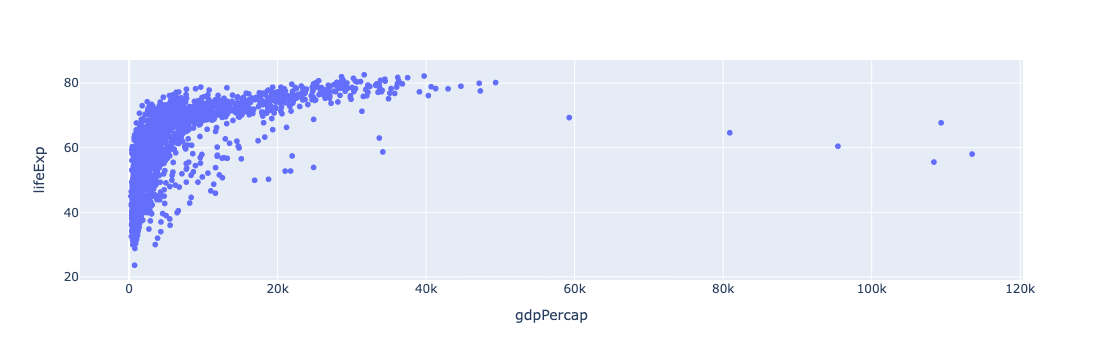

In [76]:
px.scatter(gapminder, x = 'gdpPercap', y = 'lifeExp')

### Problem 2

#### Scatter Plot of GDP vs. Life Expectancy with Country

Use `plotly` to create a scatter plot of the gapminder data with GDP on the $x$-axis and Life Expectancy on the $y$ axis and add color to each point based on the `country` column.  

Use the `plt.savefig()` method to save the image as `img2.png` in the `images` folder.

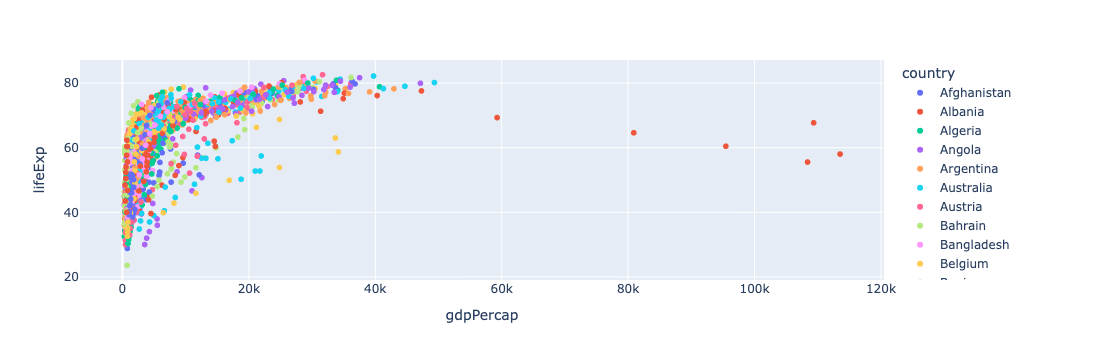

In [78]:
px.scatter(gapminder, x ='gdpPercap', y = 'lifeExp', color = 'country')

### Problem 3

#### Incorporating Population

Use `plotly` to create a scatter plot of the gapminder data with GDP on the $x$-axis and Life Expectancy on the $y$ axis, add color to each point based on the `country` column and size the points based on the population column.  

Use the `plt.savefig()` method to save the image as `img3.png` in the `images` folder.

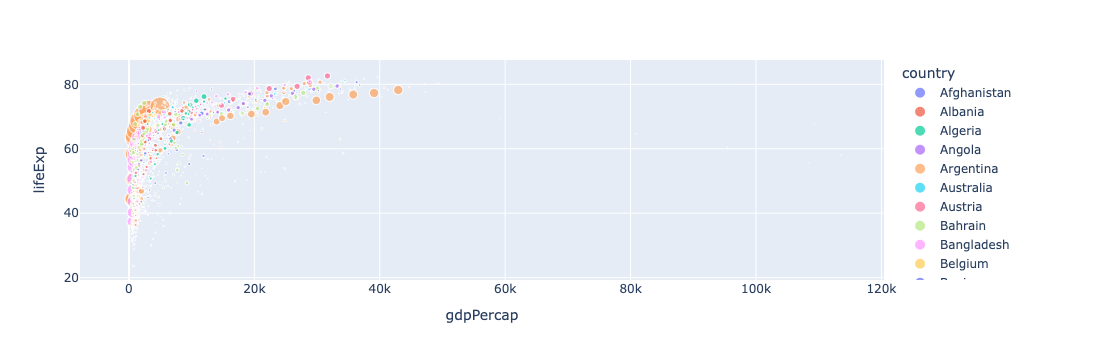

In [79]:
px.scatter(gapminder, x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop')

### Problem 4

#### Logarithmic Transformation

Use `plotly` to create a scatter plot of the gapminder data with GDP on the $x$-axis and Life Expectancy on the $y$ axis, add color to each point based on the `country` column and size the points based on the population column.    Transform the $x$-axis using the `log_x` argument in the scatter function.  

Use the `plt.savefig()` method to save the image as `img3.png` in the `images` folder.

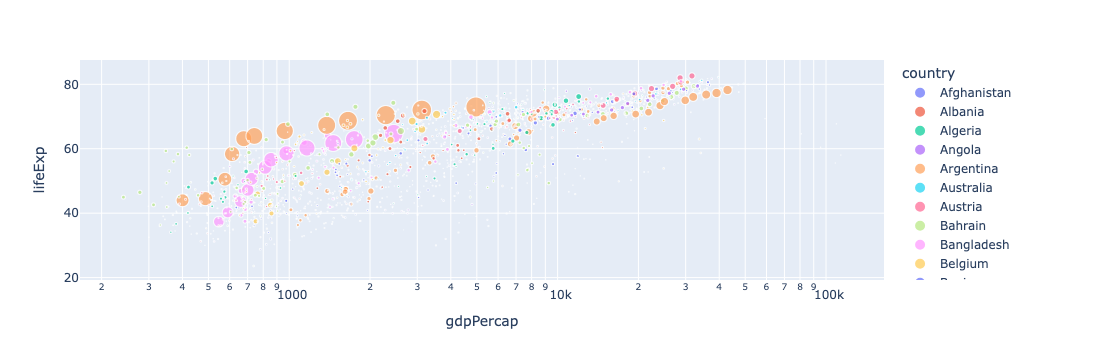

In [80]:
px.scatter(gapminder, x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop', log_x = True)

### Problem 5

#### Limit to the year 2007

Limit the data to the year 2007 and create a scatterplot of GDP vs. Life Expectancy, color by country, size the points by population and use a logarithmic transform on the x-axis. 

Use the `plt.savefig()` method to save the image as `img5.png` in the `images` folder.

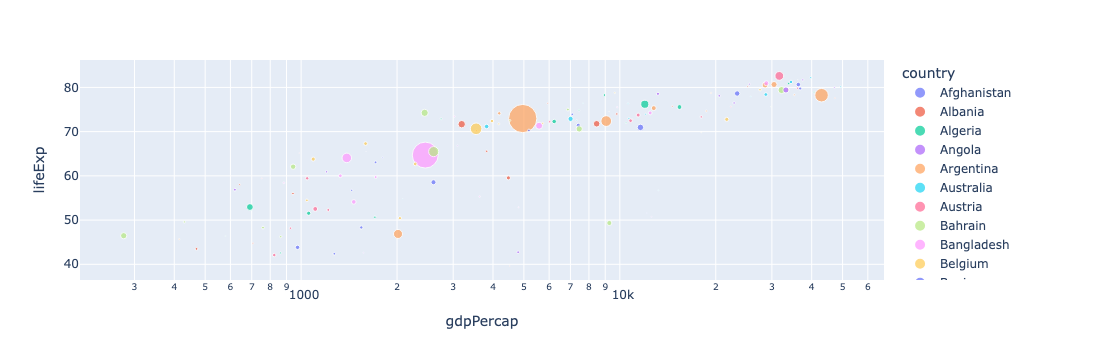

In [81]:
px.scatter(gapminder[gapminder['year'] == 2007], x = 'gdpPercap', y = 'lifeExp', color = 'country', size = 'pop', log_x = True)

### Problem 6

#### Boxplots for GDP by Continent

Use `plotly` to create boxplots for GDP by continent.  

Use the `plt.savefig()` method to save the image as `img5.png` in the `images` folder.

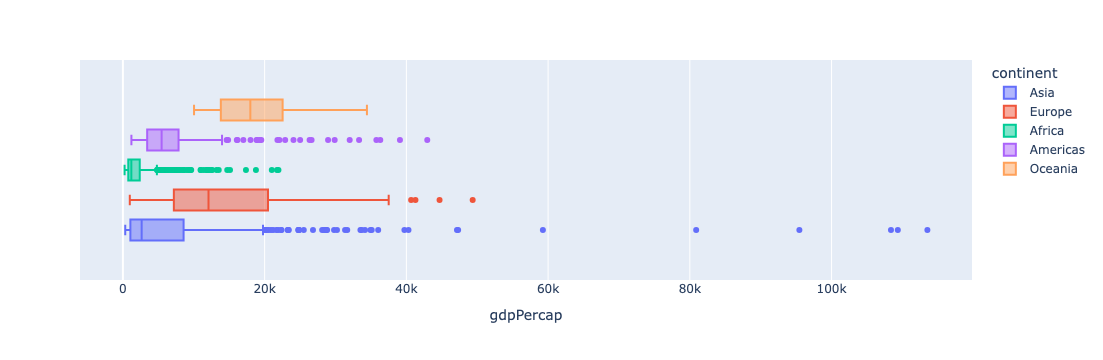

In [82]:
px.box(gapminder, x = 'gdpPercap', color = 'continent')

### Codio Activity 4.4: Creating Violin, Box, and Joint Plots

This activity focuses on producing the plots demonstrated in Video 4.6 and Video 4.7.  Specifically, histograms, Kernel Density Estimate plots, Violin, and Box plots.  The dataset is the `gapminder` data from plotly.  

#### Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)
- [Problem 9](#Problem-9)
- [Problem 10](#Problem-10)


### Problem 1

#### Histogram of Life Expectancy with `plotly`

Create a histogram of the Life Expectancy data using `plotly`.

Use the `plt.savefig()` method to save the image as `img1.png` in the `images` folder.

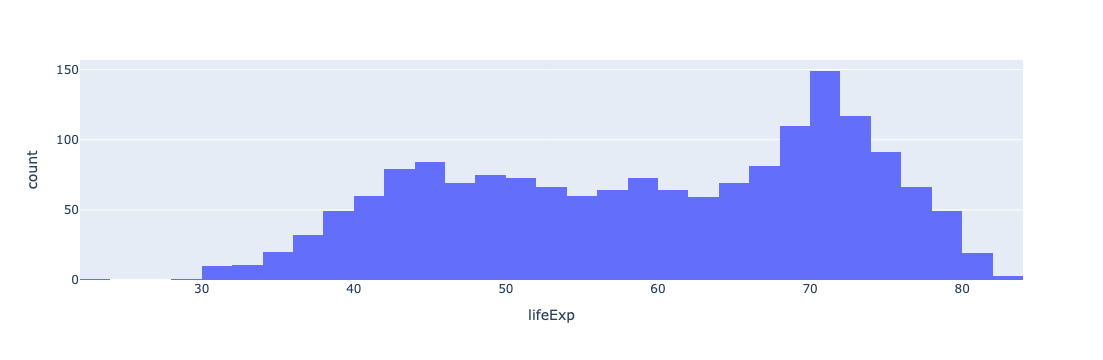

In [84]:
px.histogram(gapminder,x = 'lifeExp')

### Problem 2

#### Histogram of Life Expectancy with `seaborn`

Create a histogram of the Life Expectancy data using `seaborn`. 

Use the `plt.savefig()` method to save the image as `img2.png` in the `images` folder.

<Axes: xlabel='lifeExp', ylabel='Count'>

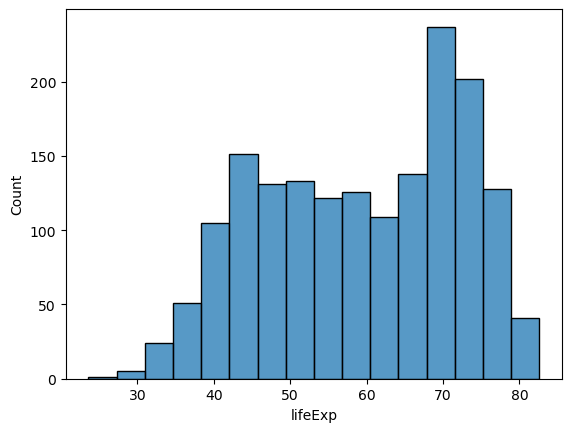

In [86]:
sns.histplot(gapminder, x = 'lifeExp')

### Problem 3

#### Histogram and KDE of Life Expectancy with `seaborn` 

Create a histogram with the KDE of the Life Expectancy data using `seaborn`.

Use the `plt.savefig()` method to save the image as `img3.png` in the `images` folder.

<Axes: xlabel='lifeExp', ylabel='Count'>

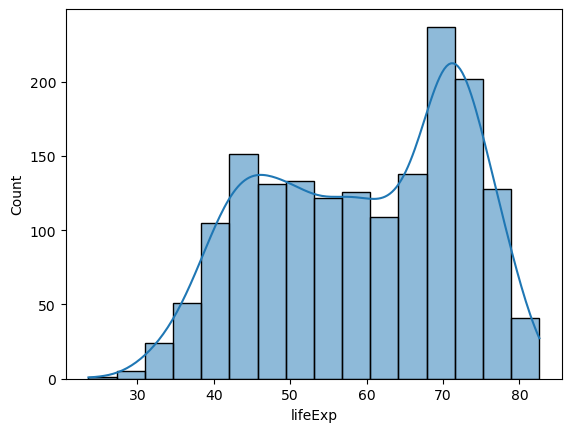

In [87]:
sns.histplot(gapminder, x = 'lifeExp', kde = True)

### Problem 4

#### Histogram, KDE, and rugplot of Life Expectancy with `seaborn`

Create a histogram and KDE of the Life Expectancy data along with the rugplot using `seaborn`.

Use the `plt.savefig()` method to save the image as `img4.png` in the `images` folder.

<Axes: xlabel='lifeExp', ylabel='Count'>

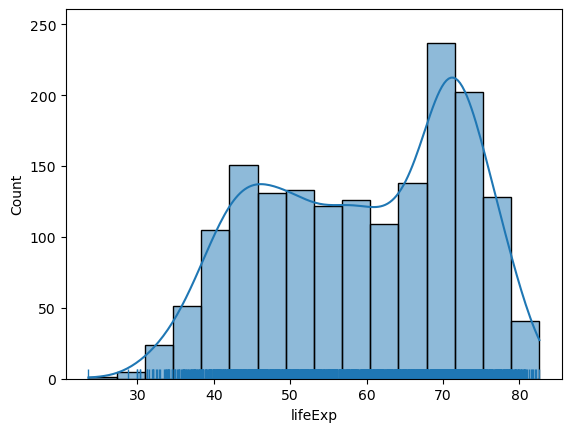

In [88]:
sns.histplot(gapminder, x = 'lifeExp', kde = True)
sns.rugplot(gapminder, x = 'lifeExp')

### Problem 5

#### Violin Plot of Life Expectancy with `plotly`

Create a Violin Plot of the Life Expectancy data using `plotly`. 

Use the `plt.savefig()` method to save the image as `img5.png` in the `images` folder.

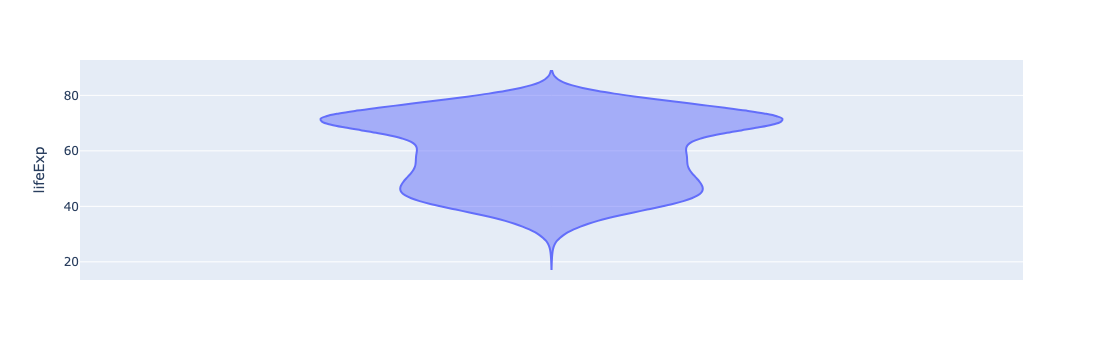

In [90]:
px.violin(gapminder, y = 'lifeExp')

### Problem 6

#### Violin Plot with points of Life Expectancy with `plotly`

Create a Violin Plot of the Life Expectancy data alongside the actual points using `plotly`. 

Use the `plt.savefig()` method to save the image as `img6.png` in the `images` folder.

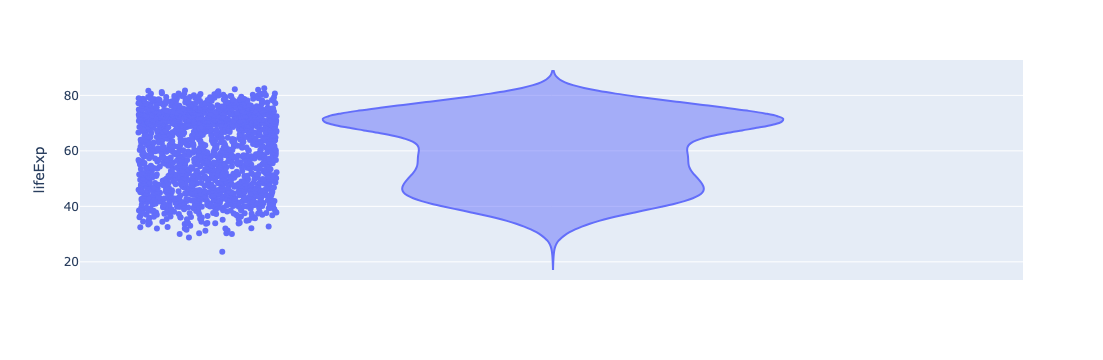

In [91]:
px.violin(gapminder, y = 'lifeExp', points = 'all')

### Problem 7

#### Violin Plot of Life Expectancy by Continent with `plotly`

Create a Violin Plot of the Life Expectancy by continent using `plotly`.

Use the `plt.savefig()` method to save the image as `img7.png` in the `images` folder.

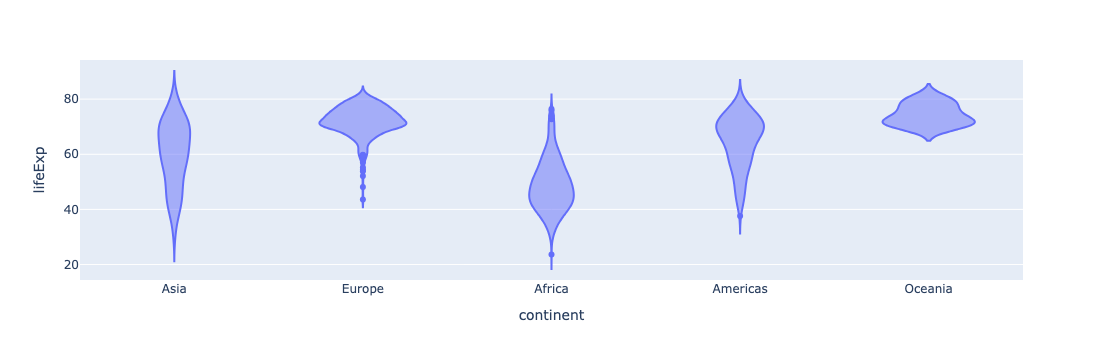

In [104]:
px.violin(gapminder, y = 'lifeExp', x = 'continent')

### Problem 8

#### Violin Plot of Life Expectancy by Continent with `seaborn`

Create a Violin Plot of the Life Expectancy by continent using `seaborn`. Note that you will set your `x` argument to continent and `y` to lifeExp.

Use the `plt.savefig()` method to save the image as `img8.png` in the `images` folder.

<Axes: xlabel='continent', ylabel='lifeExp'>

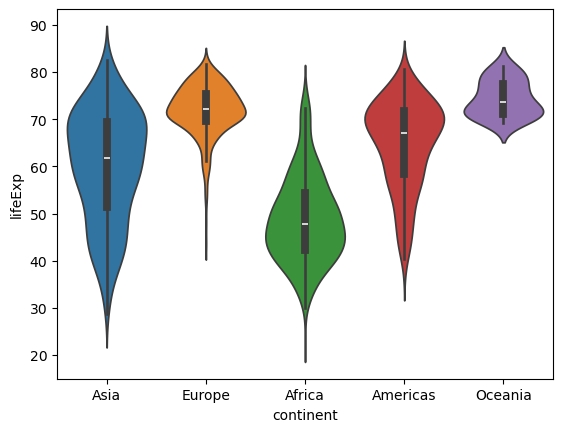

In [106]:
sns.violinplot(gapminder, x = 'continent', y = 'lifeExp', hue = 'continent')

### Problem 9

#### Box Plot of Life Expectancy by Continent with `plotly`

Create a Box Plot of the Life Expectancy by continent using `plotly`. 

Use the `plt.savefig()` method to save the image as `img9.png` in the `images` folder.

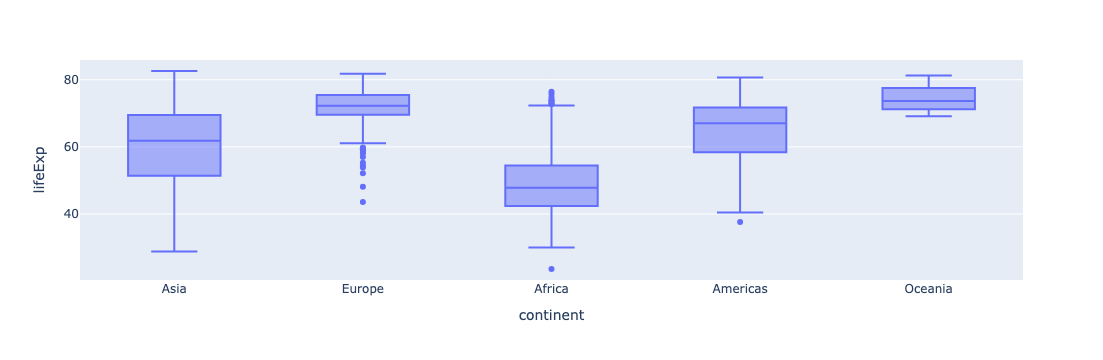

In [95]:
px.box(gapminder, y = 'lifeExp', x = 'continent') 


### Problem 10

#### Box Plot of Life Expectancy by Continent with `seaborn`

Create a Box Plot of the Life Expectancy by continent using `seaborn`. Note that you will set your `x` argument to continent and `y` to lifeExp. 

Use the `plt.savefig()` method to save the image as `img10.png` in the `images` folder.

/var/folders/s9/ml6qrgdx03zdn76qyj8422mh0000gn/T/ipykernel_1068/3653506038.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='continent', ylabel='lifeExp'>

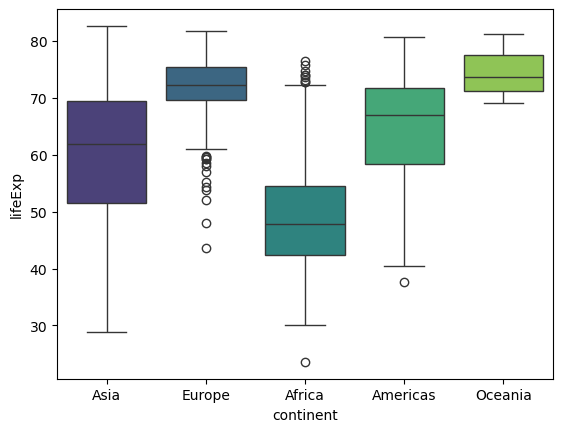

In [105]:
sns.boxplot(gapminder, y = 'lifeExp', x = 'continent', palette="viridis") 